In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Installing OpenCV

In [13]:
%pip install opencv-python


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Load & Display An Image

In [14]:
import cv2

In [15]:
duck = cv2.imread("csc-duck-raw.png")

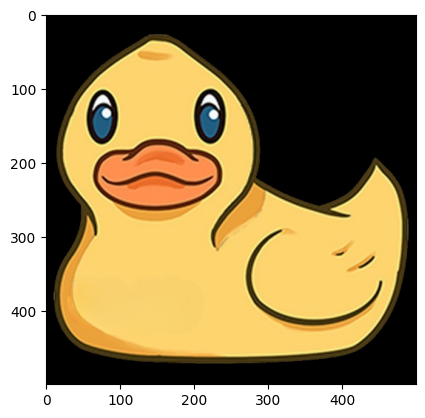

In [16]:
img_rgb = cv2.cvtColor(duck, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

#0x115fd12e0 address where the image is stored

In [17]:
#height weight number of channels
print(img_rgb.shape)

(500, 500, 3)


# Resize / Crop / Convert color channels

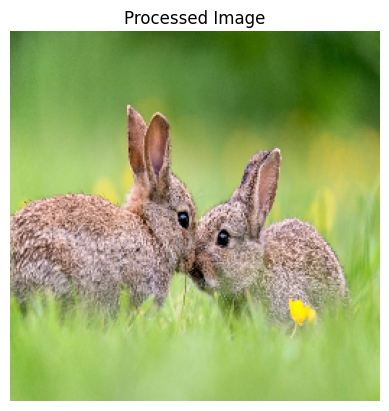

Processed and saved: processed_images/GettyImages-1153012691.jpg


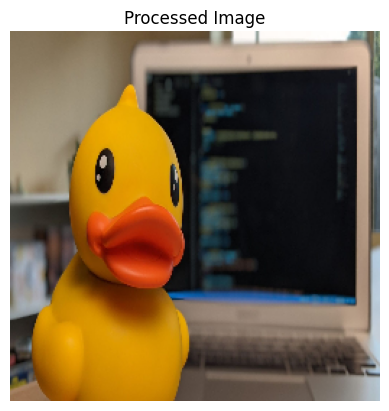

Processed and saved: processed_images/rubber_duck.jpg


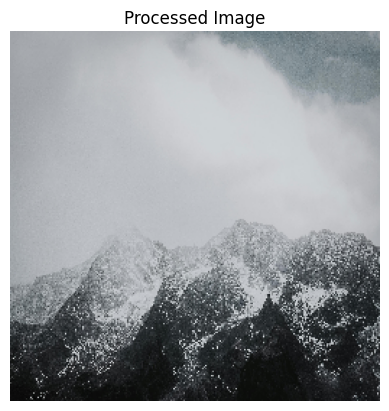

Processed and saved: processed_images/pexels-eberhardgross-1146642.jpg


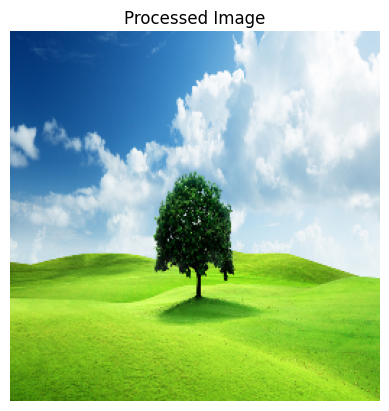

Processed and saved: processed_images/free-nature-images.jpg


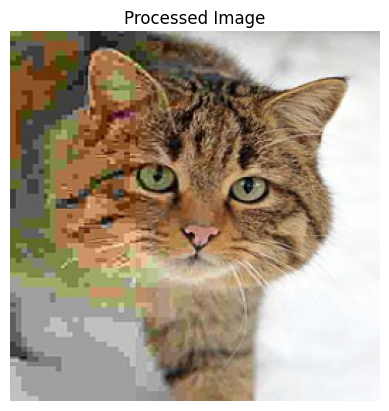

Processed and saved: processed_images/Felis_silvestris_silvestris_small_gradual_decrease_of_quality_-_JPEG_compression.jpg


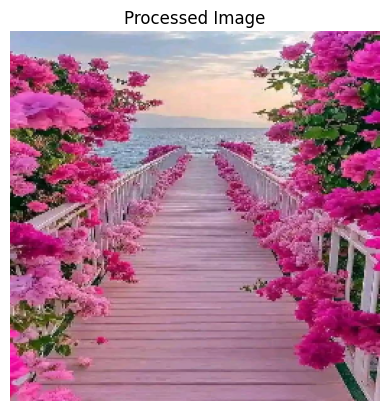

Processed and saved: processed_images/989cdafb1122686192f1aa5dcb93a434.jpg


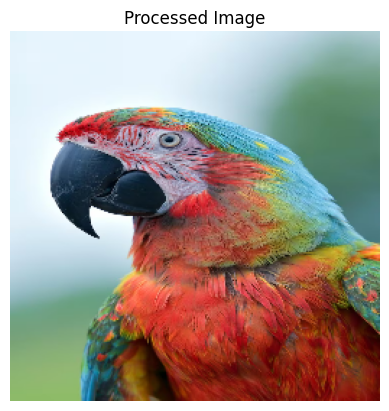

Processed and saved: processed_images/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg


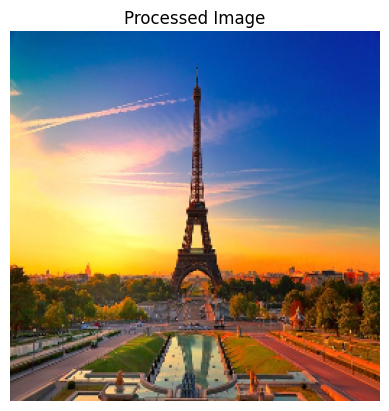

Processed and saved: processed_images/france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg


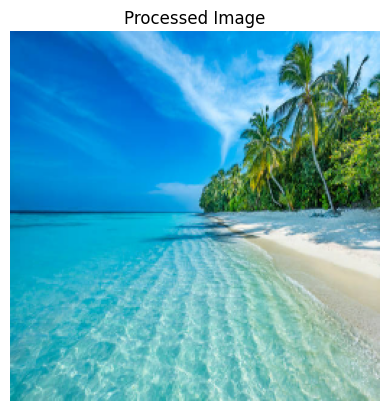

Processed and saved: processed_images/istockphoto-1442179368-612x612.jpg


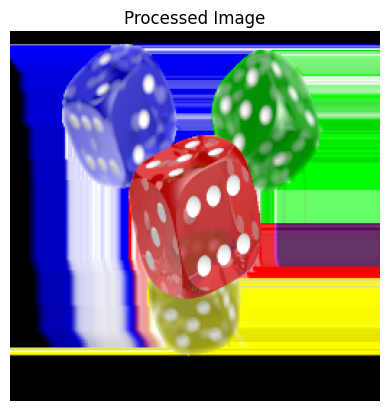

Processed and saved: processed_images/PNG_transparency_demonstration_1.png


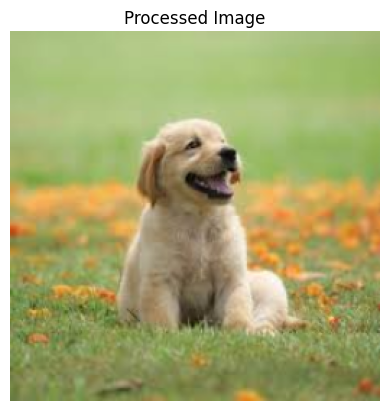

Processed and saved: processed_images/Unknown.jpeg


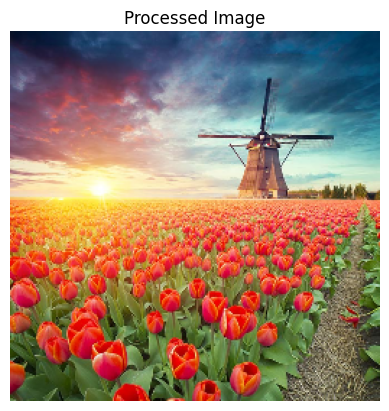

Processed and saved: processed_images/tulips-nature-pictures-166984769.jpg


In [18]:

# Input and output folder paths
input_folder = "images_folder"
output_folder = "processed_images"
os.makedirs(output_folder, exist_ok=True)

# Configuration
target_size = (256, 256)       # Resize to this size
do_center_crop = True          # Whether or not to crop the center square from the resized image

convert_to_grayscale = False   #whether to convert images ot grayscale   this converts color image to grayscale: gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
convert_to_rgb = True          # Convert BGR to RGB (ignored if grayscale)

# Process each image
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')): #do for iphone as well
        path = os.path.join(input_folder, filename)
        img = cv2.imread(path)

        if img is None:
            print(f"Could not read {filename}")
            continue

        # Resize
        img_resized = cv2.resize(img, target_size)

        # center crop
        if do_center_crop:
            h, w = img_resized.shape[:2]
            min_dim = min(h, w)
            start_x = (w - min_dim) // 2
            start_y = (h - min_dim) // 2
            img_resized = img_resized[start_y:start_y+min_dim, start_x:start_x+min_dim]

        # Convert color channels
        if convert_to_grayscale:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        elif convert_to_rgb:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        #Else: leave as BGR

        # Save processed image
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, img_resized)

        #showing the picture
        plt.imshow(img_resized)
        plt.title("Processed Image")
        plt.axis("off")
        plt.show()

        print(f"Processed and saved: {save_path}")

# convert to greyscale 

In [19]:

import cv2
#make the image grey
# Load the color image
img = cv2.imread("images_folder/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg")

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Save or display the grayscale image
cv2.imwrite('grayscale_image.jpg', gray_img)

# To display the image (optional)
cv2.imshow('Grayscale', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-09-25 17:49:30.715 Python[2951:90040] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [20]:
import cv2

# Load the color image
img = cv2.imread("images_folder/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg")

# Convert to HSV color space (still a colored image)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Save the color-transformed image
cv2.imwrite('hsv_colored_image.jpg', hsv_img)

# Display the image
cv2.imshow('HSV Colored Image', hsv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Check Image DataSet Format

In [21]:
def check_images(folder):
    images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    if not images:
        print("No images found.")
        return

    total_width = 0
    total_height = 0

    for img_name in images:
        path = os.path.join(folder, img_name)
        img = cv2.imread(path)
        if img is None:
            print(f"Can't read {img_name}")
            continue

        h, w = img.shape[:2]
        total_width += w
        total_height += h
        print(f"{img_name}: {w}x{h}")

    print(f"\nTotal images: {len(images)}")
    print(f"Average width: {total_width / len(images):.1f}")
    print(f"Average height: {total_height / len(images):.1f}")
#print(check_images("images_folder")) #no return so it returns None, it expects something
check_images("images_folder")

GettyImages-1153012691.jpg: 2121x1414
rubber_duck.jpg: 2000x1125
pexels-eberhardgross-1146642.jpg: 5472x3648
free-nature-images.jpg: 1200x630
Felis_silvestris_silvestris_small_gradual_decrease_of_quality_-_JPEG_compression.jpg: 250x289
989cdafb1122686192f1aa5dcb93a434.jpg: 589x1050
closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg: 740x1109
france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg: 730x487
istockphoto-1442179368-612x612.jpg: 612x390
PNG_transparency_demonstration_1.png: 800x600
Unknown.jpeg: 225x224
tulips-nature-pictures-166984769.jpg: 670x670

Total images: 12
Average width: 1284.1
Average height: 969.7


# Script to iterate through a folder of images and print Width / Height

In [22]:
# Set your image folder path
folder_path = "images_folder"

# Supported image extensions
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif") #move this to the top only once

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        
        if img is not None:
            height, width = img.shape[:2]
            print(f"{filename} - Width: {width}, Height: {height}")
        else:
            print(f"Failed to load: {filename}")

GettyImages-1153012691.jpg - Width: 2121, Height: 1414
rubber_duck.jpg - Width: 2000, Height: 1125
pexels-eberhardgross-1146642.jpg - Width: 5472, Height: 3648
free-nature-images.jpg - Width: 1200, Height: 630
Felis_silvestris_silvestris_small_gradual_decrease_of_quality_-_JPEG_compression.jpg - Width: 250, Height: 289
989cdafb1122686192f1aa5dcb93a434.jpg - Width: 589, Height: 1050
closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg - Width: 740, Height: 1109
france-in-pictures-beautiful-places-to-photograph-eiffel-tower.jpg - Width: 730, Height: 487
istockphoto-1442179368-612x612.jpg - Width: 612, Height: 390
PNG_transparency_demonstration_1.png - Width: 800, Height: 600
Unknown.jpeg - Width: 225, Height: 224
tulips-nature-pictures-166984769.jpg - Width: 670, Height: 670


# Script to randomly draw boxes and overlay labels on images

In [ ]:

import random

# Set the path to your image folder
folder_path = "images_folder"

# Iterate through all images in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Could not read {filename}")
            continue

        height, width = img.shape[:2]

        # Draw a random number of boxes (1 to 5)
        for i in range(random.randint(1, 5)):
            x1 = random.randint(0, width - 50)
            y1 = random.randint(0, height - 50)
            x2 = random.randint(x1 + 20, min(width, x1 + 150))
            y2 = random.randint(y1 + 20, min(height, y1 + 150))

            color = tuple(random.randint(0, 255) for _ in range(3))
            label = f"Object {i+1}"

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, color, 2)

        # Show the image
        cv2.imshow("Image with Boxes", img)
        cv2.waitKey(0)  # Press any key to show next image
        cv2.destroyAllWindows()

        

# Sumarizing dataset stats (Average Resolution, file sizes)

In [ ]:
#Set the path to your image dataset
folder_path = "images_folder"

#Supported image extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

#Stats containers
resolutions = []
file_sizes_kb = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
        file_path = os.path.join(folder_path, filename)
        
        # File size in KB
        size_kb = os.path.getsize(file_path) / 1024
        file_sizes_kb.append(size_kb)
        
        # Load image to get resolution
        img = cv2.imread(file_path)
        if img is not None:
            height, width = img.shape[:2]
            resolutions.append((width, height))
        else:
            print(f"Skipping unreadable image: {filename}")

# Convert to numpy arrays for easier calculations
res_array = np.array(resolutions)
sizes_array = np.array(file_sizes_kb)

# Summary
print(f"Total images: {len(res_array)}")
print(f"Average resolution: {res_array.mean(axis=0).astype(int)} (width x height)")
print(f"Min resolution: {res_array.min(axis=0)}")
print(f"Max resolution: {res_array.max(axis=0)}")
print(f"Average file size: {sizes_array.mean():.2f} KB")
print(f"Total dataset size: {sizes_array.sum() / 1024:.2f} MB")


Total images: 12
Average resolution: [1284  969] (width x height)
Min resolution: [225 224]
Max resolution: [5472 3648]
Average file size: 315.96 KB
Total dataset size: 3.70 MB


In [ ]:
# make all black colored things into 0 and white into I 
import cv2
import numpy as np

# Load image in grayscale
img = cv2.imread('black-vector-poppy-icon-white-background_572070-977.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold to ensure binary image (black or white)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Create an empty array of object type to store str and int
result = np.empty(binary.shape, dtype=object)

# Replace black (0) with 0
result[binary == 0] = 0

# Replace white (255) with 'I'
result[binary == 255] = 'I'


# Tell numpy to print everything
np.set_printoptions(threshold=np.inf)

# Now print your array
print(result)


# Now result is an array with 0s and 'I's
print(result)

[['I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I'
  'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 